<a href="https://colab.research.google.com/github/ailafelixa/Model-Breast-Cancer-Recurrence/blob/main/Aila_Modelo_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando pacotes necessários



In [1]:
import pandas as pd
import numpy as np
!pip install dbfread
from dbfread import DBF
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando os dados originais

In [3]:
path_all_data = '/content/drive/MyDrive/Graduação/Décimo semestre/TCC II/Raw data/filtered_df.csv'

In [4]:
df = pd.read_csv(path_all_data)

In [5]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
0,9,38,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,20171206,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
1,9,46,2,MG,SP,3524402,JACAREI ...,2,20171006,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
2,9,45,2,SP,SP,3548500,SANTOS ...,2,20190320,24,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1
3,9,43,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,20190212,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
4,5,67,2,SP,SP,3548500,SANTOS ...,1,20190702,31,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1


In [6]:
df.columns

Index(['ESCOLARI', 'IDADE', 'SEXO', 'UFNASC', 'UFRESID', 'IBGE', 'CIDADE',
       'CATEATEND', 'DTCONSULT', 'CLINICA', 'DIAGPREV', 'DTDIAG', 'BASEDIAG',
       'TOPO', 'TOPOGRUP', 'DESCTOPO', 'MORFO', 'DESCMORFO', 'EC', 'ECGRUP',
       'T', 'N', 'M', 'PT', 'PN', 'PM', 'S', 'G', 'LOCALTNM', 'IDMITOTIC',
       'PSA', 'GLEASON', 'OUTRACLA', 'META01', 'META02', 'META03', 'META04',
       'DTTRAT', 'NAOTRAT', 'TRATAMENTO', 'TRATHOSP', 'TRATFANTES',
       'TRATFAPOS', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO',
       'IMUNO', 'OUTROS', 'NENHUMANT', 'CIRURANT', 'RADIOANT', 'QUIMIOANT',
       'HORMOANT', 'TMOANT', 'IMUNOANT', 'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS',
       'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS',
       'OUTROAPOS', 'DTULTINFO', 'ULTINFO', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT',
       'ANODIAG', 'CICI', 'CICIGRUP', 'CICISUBGRU', 'FAIXAETAR', 'LATERALI',
       'INSTORIG', 'DRS', 'RRAS', 'PERDASEG', 'ERRO', 'DTRECIDIVA',
       'RECNENHUM'

In [7]:
df['TOPOGRUP'].value_counts()

C50    54217
Name: TOPOGRUP, dtype: int64

## Análise exploratória

O conjunto de dados tem 99 variáveis diferentes. Todas elas estão mapeadas nessa planilha: [Mapeamento das features - Dados Fundação Oncocentro de São Paulo](https://docs.google.com/spreadsheets/d/1L2r1G277d4B9qrjMEpRDFxbuflEYIOLojrDajy)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54217 entries, 0 to 54216
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESCOLARI    54217 non-null  int64 
 1   IDADE       54217 non-null  int64 
 2   SEXO        54217 non-null  int64 
 3   UFNASC      54217 non-null  object
 4   UFRESID     54217 non-null  object
 5   IBGE        54217 non-null  int64 
 6   CIDADE      54217 non-null  object
 7   CATEATEND   54217 non-null  int64 
 8   DTCONSULT   54217 non-null  int64 
 9   CLINICA     54217 non-null  int64 
 10  DIAGPREV    54217 non-null  int64 
 11  DTDIAG      54217 non-null  int64 
 12  BASEDIAG    54217 non-null  int64 
 13  TOPO        54217 non-null  object
 14  TOPOGRUP    54217 non-null  object
 15  DESCTOPO    54217 non-null  object
 16  MORFO       54217 non-null  int64 
 17  DESCMORFO   54217 non-null  object
 18  EC          54217 non-null  object
 19  ECGRUP      54217 non-null  object
 20  T     

#### Convertendo as colunas para os tipos corretos

Todas as colunas estão como tipo 'object'. Para facilitar a análise exploratória, vamos converte-las para os tipos corretos.

In [9]:
## Convertendo colunas numéricas
numeric_columns = []
for col in df.columns:
    try:
        pd.to_numeric(df[col], downcast='integer', errors='raise')
        numeric_columns.append(col)
    except (ValueError, TypeError):
        pass

df[numeric_columns] = df[numeric_columns].astype(int)

In [10]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
0,9,38,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,20171206,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
1,9,46,2,MG,SP,3524402,JACAREI ...,2,20171006,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
2,9,45,2,SP,SP,3548500,SANTOS ...,2,20190320,24,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1
3,9,43,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,20190212,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
4,5,67,2,SP,SP,3548500,SANTOS ...,1,20190702,31,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1


In [11]:
df.DTCONSULT.head()

0    20171206
1    20171006
2    20190320
3    20190212
4    20190702
Name: DTCONSULT, dtype: int64

In [12]:
df.DTDIAG.head()

0    20171122
1    20170914
2    20160602
3    20190115
4    20190702
Name: DTDIAG, dtype: int64

In [13]:
df.DTULTINFO.head()

0    10/04/2018
1    27/07/2022
2    09/05/2019
3    21/11/2019
4    13/08/2019
Name: DTULTINFO, dtype: object

In [14]:
## Convertendo datas; os valores com data tem strings (******) onde a data não está disponível, então é necessário antes converter isso para NA

date_columns = ['DTCONSULT', 'DTDIAG', 'DTULTINFO', 'DTRECIDIVA']
df[date_columns] = df[date_columns].replace('********', np.nan)

# A coluna 'DTULTINFO' tem uma formatação diferente de data
date_formats = {
    'DTCONSULT': '%Y%m%d',
    'DTDIAG': '%Y%m%d',
    'DTULTINFO': '%d/%m/%Y',
    'DTRECIDIVA': '%Y%m%d'
}

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format=date_formats[col])

In [15]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
0,9,38,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,2017-12-06,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
1,9,46,2,MG,SP,3524402,JACAREI ...,2,2017-10-06,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
2,9,45,2,SP,SP,3548500,SANTOS ...,2,2019-03-20,24,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1
3,9,43,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,2019-02-12,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
4,5,67,2,SP,SP,3548500,SANTOS ...,1,2019-07-02,31,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54217 entries, 0 to 54216
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ESCOLARI    54217 non-null  int64         
 1   IDADE       54217 non-null  int64         
 2   SEXO        54217 non-null  int64         
 3   UFNASC      54217 non-null  object        
 4   UFRESID     54217 non-null  object        
 5   IBGE        54217 non-null  int64         
 6   CIDADE      54217 non-null  object        
 7   CATEATEND   54217 non-null  int64         
 8   DTCONSULT   54217 non-null  datetime64[ns]
 9   CLINICA     54217 non-null  int64         
 10  DIAGPREV    54217 non-null  int64         
 11  DTDIAG      54217 non-null  datetime64[ns]
 12  BASEDIAG    54217 non-null  int64         
 13  TOPO        54217 non-null  object        
 14  TOPOGRUP    54217 non-null  object        
 15  DESCTOPO    54217 non-null  object        
 16  MORFO       54217 non-

### Quantidade de linhas, colunas e primeiros e últimos registros da tabela



In [17]:
len(df)

54217

Após a filtragem específica para câncer de mama, ficamos com 34.711 registros

In [18]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
0,9,38,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,2017-12-06,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
1,9,46,2,MG,SP,3524402,JACAREI ...,2,2017-10-06,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
2,9,45,2,SP,SP,3548500,SANTOS ...,2,2019-03-20,24,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1
3,9,43,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,2019-02-12,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
4,5,67,2,SP,SP,3548500,SANTOS ...,1,2019-07-02,31,...,,,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1


In [19]:
df.tail()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
54212,2,33,2,SP,SP,3513801,DIADEMA ...,2,2019-07-29,33,...,,,,3550308,97193,LINFOMA NASAL E TIPO NASAL DE CELULAS TNK ...,6,CACON ...,3,2
54213,3,65,2,SP,SP,3556453,VARGEM GRANDE PAULISTA ...,2,2018-12-17,15,...,C77,C42,C74,3550308,97193,LINFOMA NASAL E TIPO NASAL DE CELULAS TNK ...,6,CACON ...,3,2
54214,9,48,2,SP,SP,3554102,TAUBATE ...,2,2017-10-17,24,...,,,,3554102,97283,LINFOMA LINFOBLASTICO DE CELULAS PRECURSORAS B...,9,UNACON com Servios de Radioterapia e de Hemat...,1,1
54215,9,47,2,SP,SP,3524402,JACAREI ...,2,2017-12-18,33,...,,,,3524402,97401,MASTOCITOMA SOE ...,1,UNACON ...,1,1
54216,9,64,2,RN,SP,3518701,GUARUJA ...,2,2018-05-09,24,...,,,,3518701,97401,MASTOCITOMA SOE ...,1,UNACON ...,1,1


In [20]:
df.shape

(54217, 99)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54217 entries, 0 to 54216
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ESCOLARI    54217 non-null  int64         
 1   IDADE       54217 non-null  int64         
 2   SEXO        54217 non-null  int64         
 3   UFNASC      54217 non-null  object        
 4   UFRESID     54217 non-null  object        
 5   IBGE        54217 non-null  int64         
 6   CIDADE      54217 non-null  object        
 7   CATEATEND   54217 non-null  int64         
 8   DTCONSULT   54217 non-null  datetime64[ns]
 9   CLINICA     54217 non-null  int64         
 10  DIAGPREV    54217 non-null  int64         
 11  DTDIAG      54217 non-null  datetime64[ns]
 12  BASEDIAG    54217 non-null  int64         
 13  TOPO        54217 non-null  object        
 14  TOPOGRUP    54217 non-null  object        
 15  DESCTOPO    54217 non-null  object        
 16  MORFO       54217 non-

In [22]:
#Verificando se existem linhas duplicadas
df.duplicated().sum()

2

### Frequência da variável alvo

Como queremos predizer a recidiva, nossa label será a variável 'RECNENHUM', que infoma se o paciente teve recidiva (0) ou se não teve recidiva (1).

In [23]:
df['RECNENHUM'].value_counts()

1    48047
0     6170
Name: RECNENHUM, dtype: int64

Para facilitar a interpretação e deixar os casos positivos codificados como 1 e os negativos como zero, vamos criar uma nova coluna chamada 'REC'.

In [24]:
df['REC'] = df['RECNENHUM'].apply(lambda x: 1 if x == 0 else 0)

In [25]:
df['REC'].value_counts()

0    48047
1     6170
Name: REC, dtype: int64

In [26]:
df['N'].value_counts()

0        28598
1        14876
2         4621
X         1601
2A        1354
3         1254
3A         581
Y          488
3C         476
3B         192
2B         176
Name: N, dtype: int64

In [27]:
df['EC'].loc[df['REC']==1].value_counts()

IV       1565
IIIB     1176
IIIA     1010
IIB       780
IIA       697
IIIC      393
IA        306
0          95
X          68
Y          57
IB         23
Name: EC, dtype: int64

In [28]:
df['EC'].loc[df['REC']==0].value_counts()

IA       11344
IIA       9901
IIB       6139
IIIA      5110
0         4719
IV        3950
IIIB      3616
IIIC      1147
X          846
IB         844
Y          431
Name: EC, dtype: int64

<Figure size 1000x600 with 0 Axes>

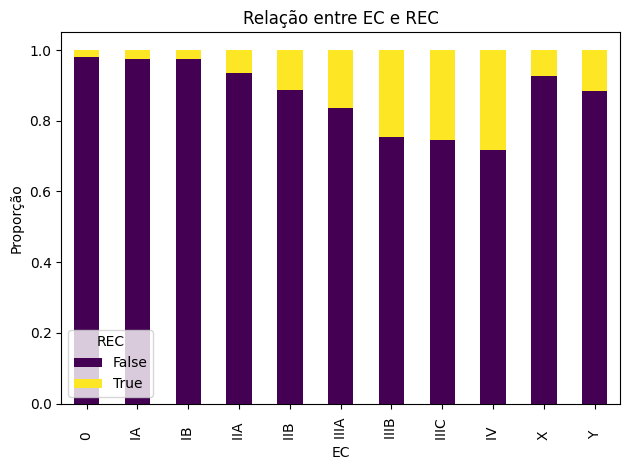

In [29]:
cross_tab = pd.crosstab(df['EC'], df['REC'], normalize='index')

plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('EC')
plt.ylabel('Proporção')
plt.title('Relação entre EC e REC')
plt.xticks(rotation=90)
plt.legend(title='REC', labels=['False', 'True'])
plt.tight_layout()
plt.show()

In [30]:
df['RECNENHUM'].value_counts(normalize=True)

1    0.886198
0    0.113802
Name: RECNENHUM, dtype: float64

Podemos ver que o dataset é altamente desbalanceado, com apenas cerca de 7% dos casos com recidiva e ~93% sem recidiva

Temos também as variáveis 'RECLOCAL', 'RECREGIO' e 'RECDIST' que informam se a recidiva foi local, regional ou a distância (metástase)

In [31]:
df['RECLOCAL'].value_counts()

0    52810
1     1407
Name: RECLOCAL, dtype: int64

In [32]:
df['RECREGIO'].value_counts()

0    53636
1      581
Name: RECREGIO, dtype: int64

In [33]:
df['RECDIST'].value_counts()

0    49108
1     5109
Name: RECDIST, dtype: int64

In [34]:
df['RECLOCAL'].loc[(df['RECDIST']==0) & (df['RECREGIO']==0)].value_counts()

0    48048
1      769
Name: RECLOCAL, dtype: int64

A frequência de recidiva regional é bastante baixa. A frequência de recidiva a distância compreende a maior parte dos casos.

#### Quantidade de dados por ano

In [35]:
df['ANODIAG'].value_counts()

2014    9719
2015    9225
2016    9059
2019    8820
2018    8797
2017    8597
Name: ANODIAG, dtype: int64

A maior parte dos registros é de 2019, seguido por 2019, 2020, 2021 e 2022, o último com apenas 3766 registros.

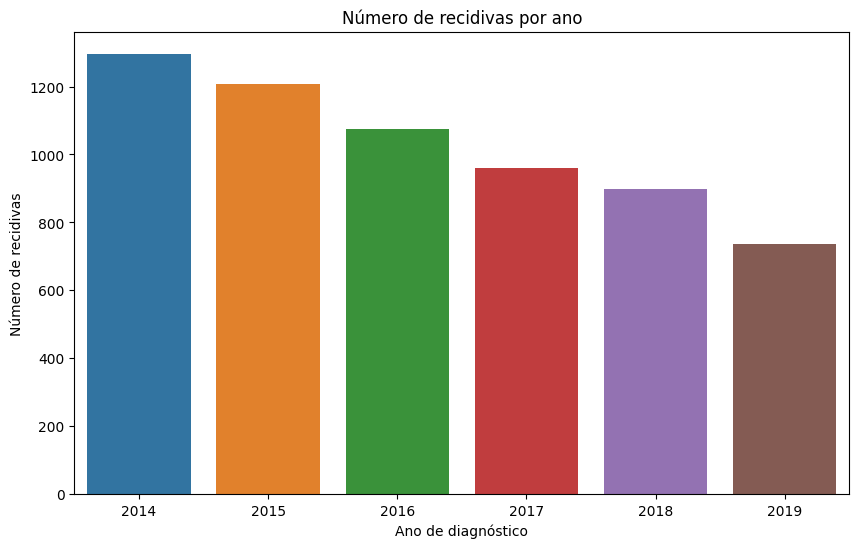

In [36]:
recurrence_counts = df.groupby('ANODIAG')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ANODIAG', y='REC', data=recurrence_counts)
plt.title('Número de recidivas por ano')
plt.xlabel('Ano de diagnóstico')
plt.ylabel('Número de recidivas')
plt.show()

A maior parte dos casos de recidiva que temos é de 2018. Isso porque, de acordo com a fundação oncocentro, os casos após 2018 ainda estão com registros em andamento.

#### Quantidade de topografias distintas

In [37]:
df['TOPO'].value_counts()

C504    15402
C508    12547
C509    11189
C502     3947
C501     3260
C505     2884
C503     2369
C500     2078
C506      541
Name: TOPO, dtype: int64

A topografia mais comum (8842 registros) é a C50.4, que se refere ao câncer de mama no quadrante superior externo da mama, seguido pelo C50.9 que se refere a glândula mamária. A topografia menos comum é a C50.6, onde o tumor se localiza no prolongamento axilar da mama

**C50 MAMA (exclui pele da mama C44.5)**

**C50.0 Mamilo**
Aréola

**C50.1 Porção central da mama**

**C50.2 Quadrante superior interno da mama**

**C50.3 Quadrante inferior interno da mama**

**C50.4 Quadrante superior externo da mama**

**C50.5 Quadrante inferior externo da mama**

**C50.6 Prolongamento axilar da mama**

**C50.8 Lesão sobreposta da mama**

Linha média da mama

Mama externa

Mama inferior

Mama interna

Mama superior

**C50.9 Mama, SOE (exclui pele da mama
C44.5)**
Glândula mamária

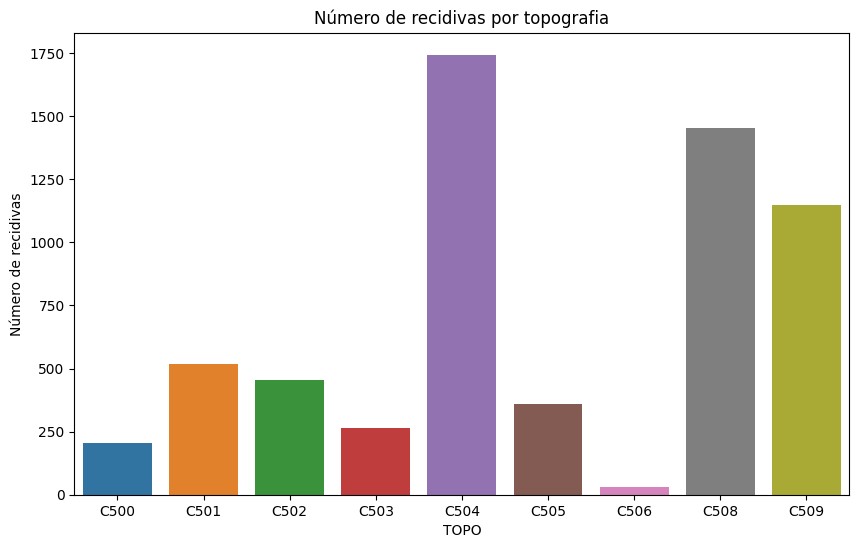

In [38]:
topo_recurrence_counts = df.groupby('TOPO')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='TOPO', y='REC', data=topo_recurrence_counts)
plt.title('Número de recidivas por topografia')
plt.xlabel('TOPO')
plt.ylabel('Número de recidivas')
plt.show()

A topografia C50.4 parece estar presente na maior parte dos casos de recidiva

### Distribuição de idade e sexo

#### Idade

<Axes: xlabel='IDADE', ylabel='Count'>

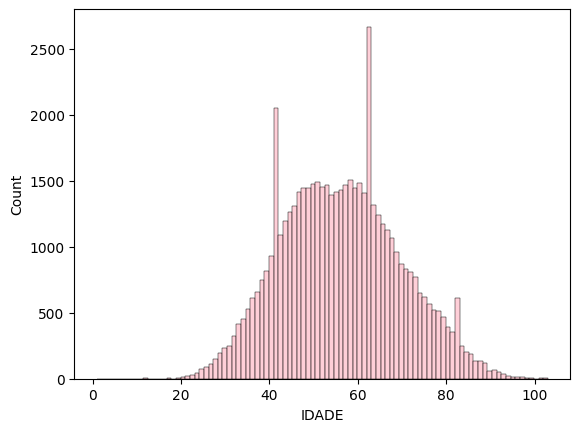

In [39]:
sns.histplot(x=df['IDADE'], color='pink')

A distribuição de idade parece seguir um padrão próximo a distribuição normal. Entretanto é relevante notar que existem alguns pontos em algumas faixas de idade onde a frequência é quase ou mais do que o dobro dos pontos ao redor. Um exemplo é o ponto ao redor dos 50 anos. Isso pode acontecer porque o screening obrigatório para câncer de mama começa aos 40 anos e as chances de câncer aumentam com a idade.

In [40]:
df['IDADE'].describe()

count    54217.000000
mean        56.270948
std         13.444375
min          1.000000
25%         46.000000
50%         56.000000
75%         66.000000
max        103.000000
Name: IDADE, dtype: float64

* A **média** de idade dos pacientes é de 56 anos, com um desvio padrão de 13 anos, ou seja, gira em torno de 43 a 69 anos.

* O **valor mínimo** é 1, o que pode ser um dado inserido incorretamente ou um caso de câncer infantil.

* A **idade máxima** foi 102 anos.

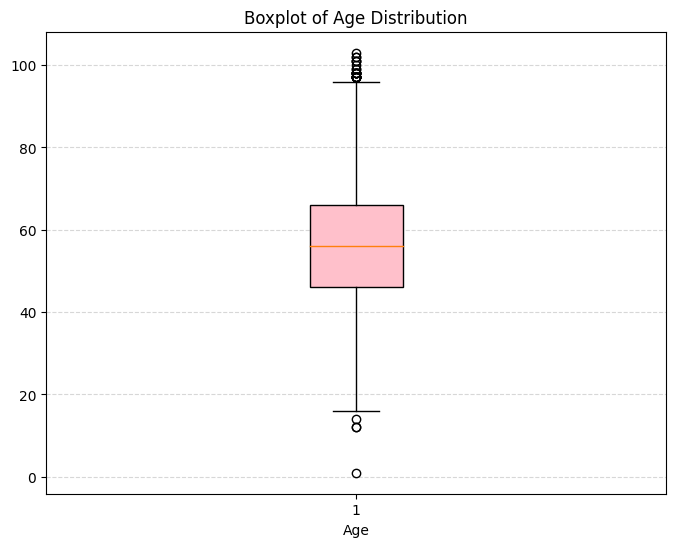

In [41]:
plt.figure(figsize=(8, 6))
bp = plt.boxplot(df['IDADE'], patch_artist=True)

for box in bp['boxes']:
    box.set(facecolor='pink')

plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.5)

plt.xlabel('Age')
plt.ylabel('')
plt.title('Boxplot of Age Distribution')

plt.show()

No boxplot é possível observar as informações descritas e que existem alguns outliers em idades < 20 e > 90, aproximadamente.

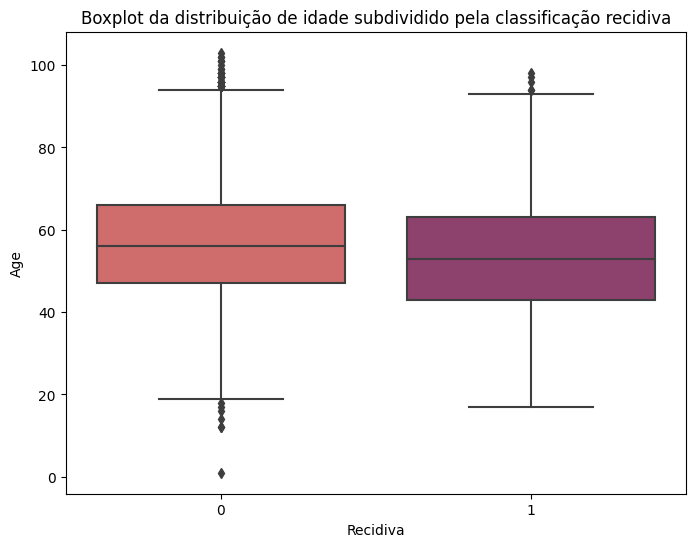

In [42]:
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x='REC', y='IDADE', data=df, palette="flare")

# Add labels and title
plt.xlabel('Recidiva')
plt.ylabel('Age')
plt.title('Boxplot da distribuição de idade subdividido pela classificação recidiva')

# Show the plot
plt.show()

Pacientes que tiveram recidiva possuem a faixa de idade parecida, apesar de levemente inferior, a dos pacientes  que não tiveram recidiva

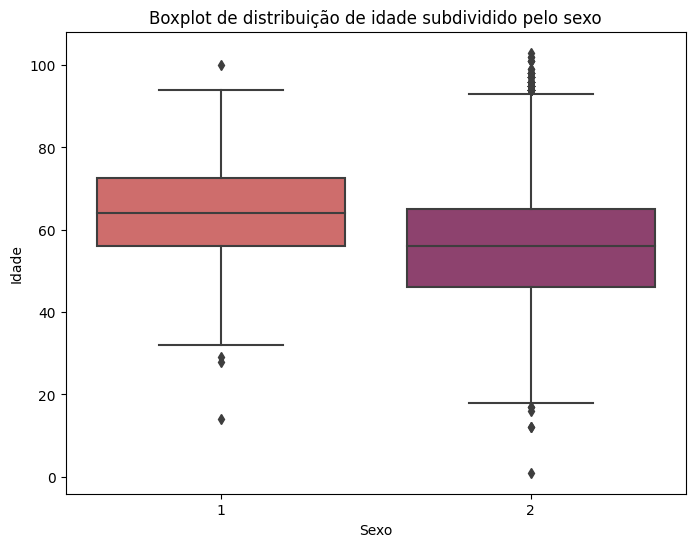

In [43]:
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x='SEXO', y='IDADE', data=df, palette="flare")

# Add labels and title
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.title('Boxplot de distribuição de idade subdividido pelo sexo')

# Show the plot
plt.show()

A idade parece ser similar entre os diferentes subtipos tumorais e os diferentes anos de diagnóstico incluidos. Comparando a distribuição de idade entre câncer de mama feminino e masculino, é possível ver que o câncer de mama masculino (1) em geral se manifesta em uma idade mais elevada.

#### Sexo

In [44]:
df['SEXO'] = df['SEXO'].astype(int)

In [45]:
df['SEXO'].value_counts()

2    53842
1      375
Name: SEXO, dtype: int64

Como esperado, a frequência para casos de câncer de mama no sexo feminino corresponde a maioria dos dados.

In [46]:
proporcao_recidiva_feminina = (df[(df['SEXO'] == 2) & (df['REC'] == 1)].shape[0] / df[df['SEXO'] == 2].shape[0])*100
print(f"A proporção de pacientes femininas com recidiva é: {proporcao_recidiva_feminina:.2f}%")

A proporção de pacientes femininas com recidiva é: 11.39%


In [47]:
proporcao_recidiva_masculina = (df[(df['SEXO'] == 1) & (df['REC'] == 1)].shape[0] / df[df['SEXO'] == 1].shape[0])*100
print(f"A proporção de pacientes masculinos com recidiva é: {proporcao_recidiva_masculina:.2f}%")

A proporção de pacientes masculinos com recidiva é: 9.87%


A frequêcia de recidiva nesse caso também é proporcionalmente maior na população feminina do que na população masculina

### Categoria de atendimento

1 - CONVENIO

2 - SUS

3 – PARTICULAR

9 – SEM INFORMAÇÃO

In [48]:
df['CATEATEND'] = df['CATEATEND'].astype(int)

In [49]:
df['CATEATEND'].value_counts()

2    44051
1     9583
3      583
Name: CATEATEND, dtype: int64

A grande maioria dos pacientes do banco de dados foram atendidos pelo SUS.

20% dos registros são de pacientes com convênio e menos de 1% são de pacientes com atendimento ao diagnóstico particular

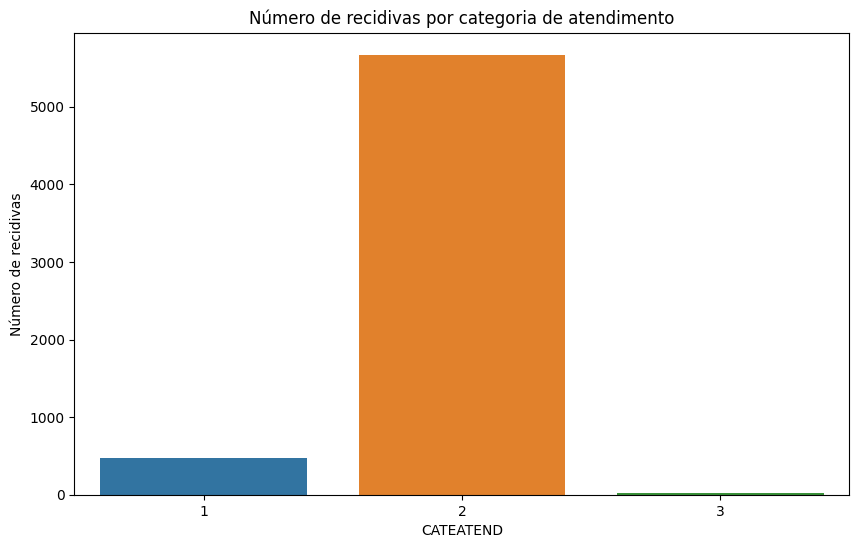

In [50]:
cateatend_recurrence_counts = df.groupby('CATEATEND')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CATEATEND', y='REC', data=cateatend_recurrence_counts)
plt.title('Número de recidivas por categoria de atendimento')
plt.xlabel('CATEATEND')
plt.ylabel('Número de recidivas')
plt.show()

In [51]:
proporcao_recidiva_sus = (df[(df['CATEATEND'] == 2) & (df['REC'] == 1)].shape[0] / df[df['CATEATEND'] == 2].shape[0])*100
print(f"Proporção de recidiva em pacientes SUS: {proporcao_recidiva_sus:.2f}%")

Proporção de recidiva em pacientes SUS: 12.87%


In [52]:
proporcao_recidiva_convenio = (df[(df['CATEATEND'] == 1) & (df['REC'] == 1)].shape[0] / df[df['CATEATEND'] == 1].shape[0])*100
print(f"Proporção de recidiva em pacientes Convenio: {proporcao_recidiva_convenio:.2f}%")

Proporção de recidiva em pacientes Convenio: 4.97%


In [53]:
proporcao_recidiva_particular = (df[(df['CATEATEND'] == 3) & (df['REC'] == 1)].shape[0] / df[df['CATEATEND'] == 3].shape[0])*100
print(f"Proporção de recidiva em pacientes Particular: {proporcao_recidiva_particular:.2f}%")

Proporção de recidiva em pacientes Particular: 3.95%


Como a maior parte dos dados do dataset são de pacientes SUS, a maior parte das recidivas também são representadas por esses pacientes.

### Escolaridade

1 – ANALFABETO

2 – ENS. FUND. INCOMPLETO

3 – ENS. FUND. COMPLETO

4 – ENSINO MÉDIO

5 – SUPERIOR

9 – IGNORADA

In [54]:
df['ESCOLARI'].value_counts()

2    13151
4    11311
9    11012
3     9686
5     7542
1     1515
Name: ESCOLARI, dtype: int64

A maior parte dos pacientes tem apenas Ensino Médio ou escolaridade ignorada. Pacientes que possuem apenas ensino fundamental completo ou que são analfabetos estão em menor quantidade no conjunto de dados.

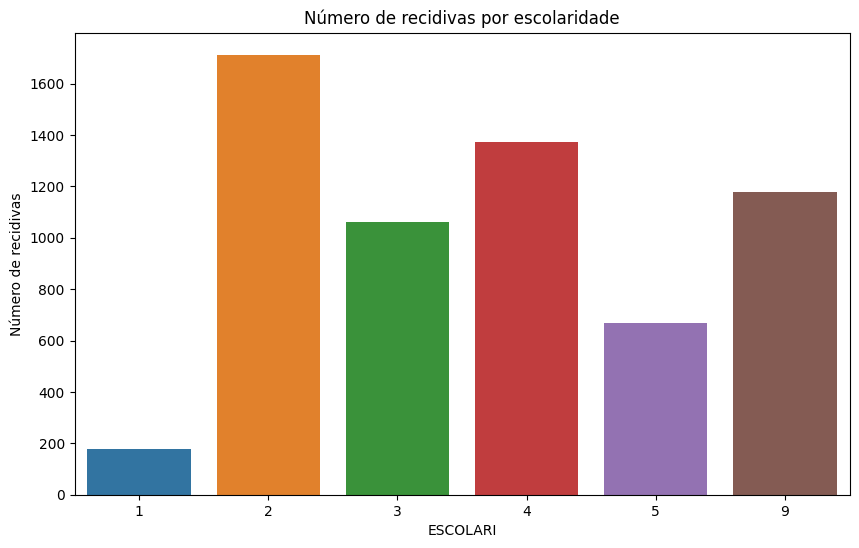

In [55]:
escolaridade_recurrence_counts = df.groupby('ESCOLARI')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ESCOLARI', y='REC', data=escolaridade_recurrence_counts)
plt.title('Número de recidivas por escolaridade')
plt.xlabel('ESCOLARI')
plt.ylabel('Número de recidivas')
plt.show()

In [56]:
proporcao_recidiva_1 = (df[(df['ESCOLARI'] == 1) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 1].shape[0])*100
print(f"Proporção de recidiva em pacientes analfabetos: {proporcao_recidiva_1:.2f}%")

Proporção de recidiva em pacientes analfabetos: 11.82%


In [57]:
proporcao_recidiva_2 = (df[(df['ESCOLARI'] == 2) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 2].shape[0])*100
print(f"Proporção de recidiva em pacientes fund. incompleto: {proporcao_recidiva_2:.2f}%")

Proporção de recidiva em pacientes fund. incompleto: 13.03%


In [58]:
proporcao_recidiva_3 = (df[(df['ESCOLARI'] == 3) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 3].shape[0])*100
print(f"Proporção de recidiva em pacientes fund. completo: {proporcao_recidiva_3:.2f}%")

Proporção de recidiva em pacientes fund. completo: 10.94%


In [59]:
proporcao_recidiva_4 = (df[(df['ESCOLARI'] == 4) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 4].shape[0])*100
print(f"Proporção de recidiva em pacientes com ensino médio: {proporcao_recidiva_4:.2f}%")

Proporção de recidiva em pacientes com ensino médio: 12.13%


In [60]:
proporcao_recidiva_5 = (df[(df['ESCOLARI'] == 5) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 5].shape[0])*100
print(f"Proporção de recidiva em pacientes com ensino superior: {proporcao_recidiva_5:.2f}%")

Proporção de recidiva em pacientes com ensino superior: 8.86%


In [61]:
proporcao_recidiva_9 = (df[(df['ESCOLARI'] == 9) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 9].shape[0])*100
print(f"Proporção de recidiva em pacientes com escolaridade ignorada: {proporcao_recidiva_9:.2f}%")

Proporção de recidiva em pacientes com escolaridade ignorada: 10.70%


A maior proporção de recidivas parece acontecer em pacientes analfabetos e com ensino fundamentos incompleto. Isso pode estar associado a condições de renda e acesso a saúde que podem ser fatores de risco em relação ao câncer

### Como os tipos de estadiamento se relacionam com a variável alvo?

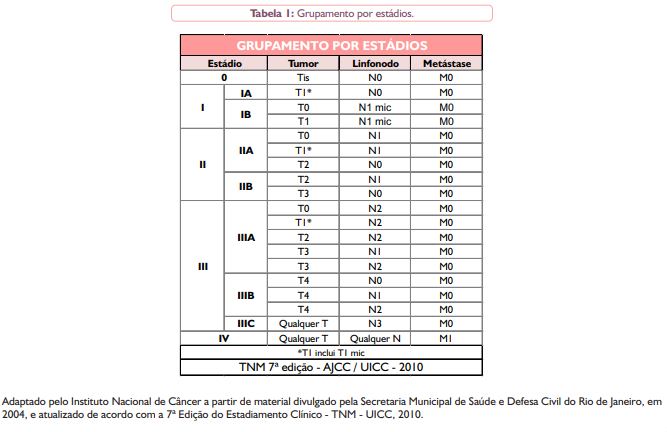

In [62]:
df.ECGRUP.value_counts()

II     17517
I      12517
III    12452
IV      5515
0       4814
X        914
Y        488
Name: ECGRUP, dtype: int64

A maior parte dos pacientes está no estadiamente IA, onde existe um carcinoma in situ mas não existe metástase para linfonodos regionais ou a distância.

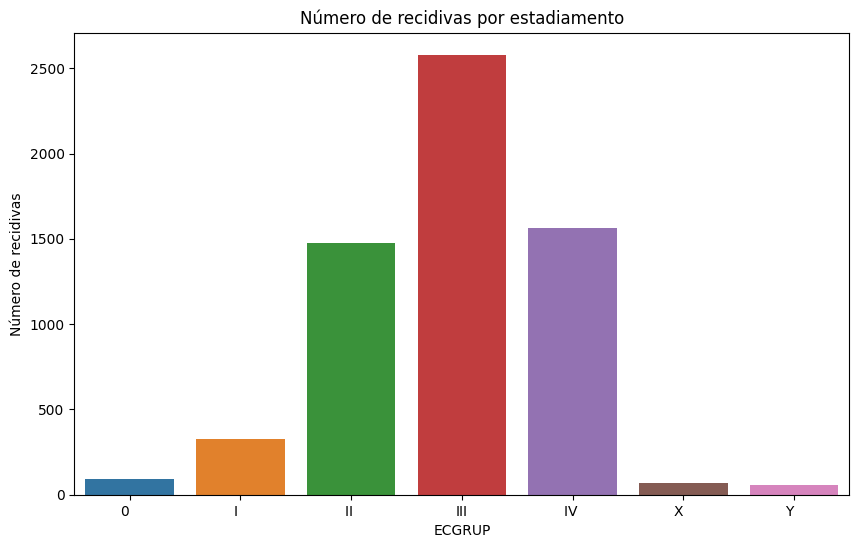

In [63]:
estadiamento_recurrence_counts = df.groupby('ECGRUP')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ECGRUP', y='REC', data=estadiamento_recurrence_counts)
plt.title('Número de recidivas por estadiamento')
plt.xlabel('ECGRUP')
plt.ylabel('Número de recidivas')
plt.show()

A maior parte dos pacientes que tiveram recidiva tinham tumores nos grupos de estadiamento III e IV.

### RRAS

As RRAS são as Redes Regionais de Atenção à Saúde do Estado de São Paulo e servem para organizar o cuidado ao câncer no Estado. Ao todo existem 17 RRAS, sendo que a maior parte dos serviços oncológicos se localizam na cidade de São Paulo (RRAS06).

In [64]:
df['RRAS'].value_counts()

6     16179
13     4557
12     4115
15     3725
99     3085
9      2873
1      2684
2      2443
5      1948
8      1939
10     1828
14     1792
7      1740
17     1552
16     1408
4      1105
11      883
3       361
Name: RRAS, dtype: int64

De fato, a maior parte dos registros se localiza na RRAS 06 que compreende o município de São Paulo, seguida pela RRAS 12 que compreende as regiões de Araçatuba e São José do Rio Preto.

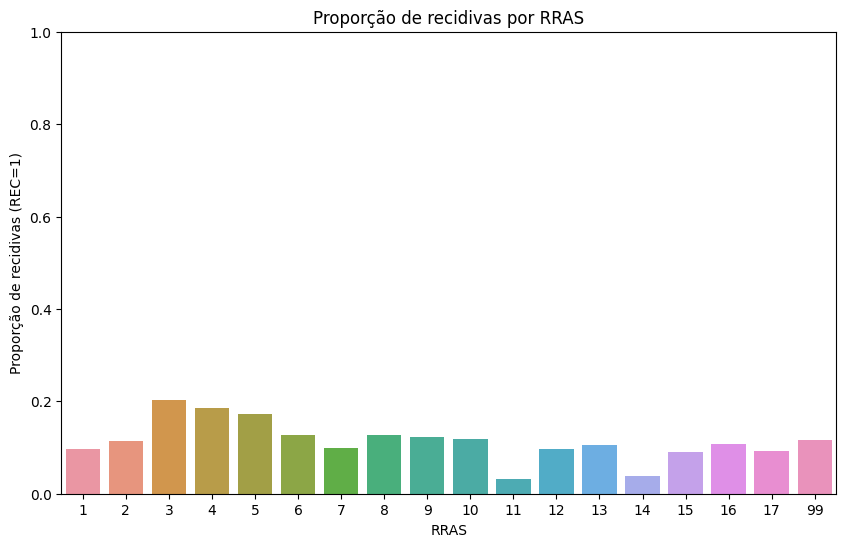

In [65]:
rras_recurrence_counts = df.groupby('RRAS')['REC'].mean().reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='RRAS', y='REC', data=rras_recurrence_counts)
plt.title('Proporção de recidivas por RRAS')
plt.xlabel('RRAS')
plt.ylabel('Proporção de recidivas (REC=1)')
plt.ylim(0, 1)  # Define o limite do eixo Y para valores entre 0 e 1
plt.show()

A média de recidivas é maior na RRAS 3, 4 e 5. É interessante salientar que até outubro de 2020 a RRAS 03
e a RRAS 05, que é a região de saúde de Franco da Rocha e da rota dos bandeirantes, respectivamente, não possuiam nenhum serviço oncológico, o que ressalta a desigualdade de acesso a saúde no Estado de São Paulo. Já a RRAS04, que compreende 8 municípios da região de saúde 'Mananciais' possuia apenas 2 serviços oncológicos até 2020.

Fontes: [Termo de Referência para a estruturação de Redes Regionais de Atenção à Saúde no Estado de São Paulo](http://saude.sp.gov.br/resources/ses/perfil/gestor/homepage/redes-regionais-de-atencao-a-saude-no-estado-de-sao-paulo/redes-regionais-de-atencao-a-saude-rras/termo_de_referencia_redes_regionais.pdf)

[PLANO DE ATENÇÃO ONCOLÓGICA
DO ESTADO DE SÃO PAULO](https://www.saude.sp.gov.br/resources/ses/perfil/gestor/documentos-de-planejamento-em-saude/plano_estadual_de_oncologia_do_estado_de_sao_paulo-2020.pdf)

### Qual o período médio entre o diagnóstico e a recidiva

In [66]:
df['DTRECIDIVA'].value_counts()

2018-08-01    13
2018-01-15    11
2020-03-16    11
2021-02-02    11
2019-08-16    10
              ..
2018-11-11     1
2016-03-30     1
2014-04-22     1
2015-07-06     1
2022-06-07     1
Name: DTRECIDIVA, Length: 2161, dtype: int64

In [67]:
df['DATEDIFF_DIAG_REC'] = np.where(df['RECNENHUM'] == 0, (df['DTRECIDIVA'] - df['DTDIAG']).dt.days, np.nan)

In [68]:
df[['ESCOLARI', 'IDADE', 'SEXO', 'RECNENHUM', 'DTDIAG', 'DTRECIDIVA', 'DATEDIFF_DIAG_REC']].loc[df['RECNENHUM']==0].head()

,ESCOLARI,IDADE,SEXO,RECNENHUM,DTDIAG,DTRECIDIVA,DATEDIFF_DIAG_REC
63,4,56,2,0,2018-06-04,2018-10-25,143.0
88,9,69,2,0,2015-11-25,2016-08-15,264.0
109,2,64,2,0,2014-04-24,2014-04-24,0.0
215,4,44,2,0,2016-03-09,2019-02-04,1062.0
259,2,54,2,0,2015-02-11,2020-01-30,1814.0


In [69]:
df[['ESCOLARI', 'IDADE', 'SEXO', 'RECNENHUM', 'DTDIAG', 'DTRECIDIVA', 'DATEDIFF_DIAG_REC']].loc[df['RECNENHUM']==0].tail()

,ESCOLARI,IDADE,SEXO,RECNENHUM,DTDIAG,DTRECIDIVA,DATEDIFF_DIAG_REC
54182,4,67,2,0,2018-05-16,2022-06-07,1483.0
54185,4,46,2,0,2018-03-27,2022-03-21,1455.0
54199,5,74,2,0,2016-07-28,2021-06-22,1790.0
54212,2,33,2,0,2019-07-17,2020-04-27,285.0
54213,3,65,2,0,2019-01-09,2019-07-05,177.0


Em alguns dados a data de recidiva está menor do que a data do diagnóstico. Provavelmente são erros no preenchimento dos dados (?)

In [70]:
df['DATEDIFF_DIAG_REC'].loc[df['DATEDIFF_DIAG_REC']<0].describe()

count      14.000000
mean     -253.071429
std       446.631747
min     -1339.000000
25%      -143.000000
50%       -63.500000
75%       -13.250000
max        -3.000000
Name: DATEDIFF_DIAG_REC, dtype: float64

In [71]:
df['DATEDIFF_DIAG_REC'].loc[df['DATEDIFF_DIAG_REC']>0].describe()

count    6100.000000
mean      859.808525
std       582.607686
min         1.000000
25%       427.000000
50%       735.500000
75%      1163.250000
max      3263.000000
Name: DATEDIFF_DIAG_REC, dtype: float64

<Axes: xlabel='DATEDIFF_DIAG_REC', ylabel='Count'>

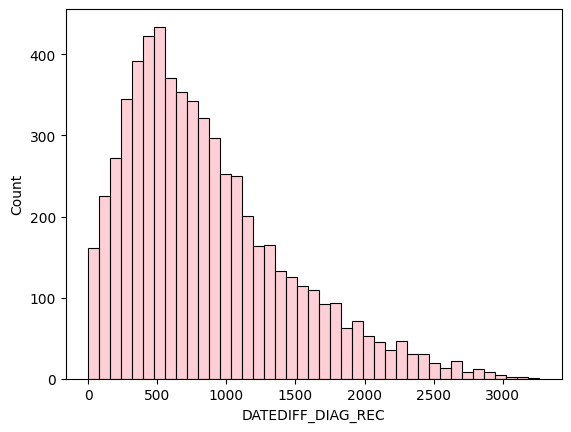

In [72]:
sns.histplot(df['DATEDIFF_DIAG_REC'].loc[df['DATEDIFF_DIAG_REC']>0], color='pink')

Mesmo com os outliers, é possível verificar que a mediana do tempo entre o diagnóstico e a última recidiva é de cerca de 500 dias após o diagnóstico, podendo chegar a mais de 1500 dias (cerca de 4 anos). A distribuição é bastante direcionada para a direita.

## Pré-processamento

### Retirando dados onde a data do diagnóstico é menor do que a data da recidiva

In [73]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2,REC,DATEDIFF_DIAG_REC
0,9,38,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,2017-12-06,24,...,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1,0,NaN
1,9,46,2,MG,SP,3524402,JACAREI ...,2,2017-10-06,33,...,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1,0,NaN
2,9,45,2,SP,SP,3548500,SANTOS ...,2,2019-03-20,24,...,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1,0,NaN
3,9,43,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,2019-02-12,24,...,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1,0,NaN
4,5,67,2,SP,SP,3548500,SANTOS ...,1,2019-07-02,31,...,,3548500,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,2,UNACON com Servio de Radioterapia ...,1,1,0,NaN


In [74]:
filtro_data = (df['DTRECIDIVA'] > df['DTDIAG']) | df['DTRECIDIVA'].isna()

In [75]:
df = df[filtro_data]

In [76]:
df.REC.value_counts()

0    48047
1     6100
Name: REC, dtype: int64

### Retirando casos de óbito

In [77]:
df.NAOTRAT.value_counts()

8    52884
7      608
2      259
5      163
4      107
3       67
1       33
6       26
Name: NAOTRAT, dtype: int64

In [78]:
filtro_naotrat = ~df['NAOTRAT'].isin([2, 5, 6])

In [79]:
df = df[filtro_naotrat]

In [80]:
df.NAOTRAT.value_counts()

8    52884
7      608
4      107
3       67
1       33
Name: NAOTRAT, dtype: int64

In [81]:
df.REC.value_counts()

0    47602
1     6097
Name: REC, dtype: int64

### Retirando colunas que não se aplicam a câncer de mama

In [82]:
un_columns = ['PSA', 'GLEASON', 'S', 'G', 'LOCALTNM', 'IDMITOTIC']

In [83]:
df.drop(columns=un_columns, inplace=True)

In [84]:
colunas_deletadas = all(coluna not in df.columns for coluna in un_columns)

if colunas_deletadas:
    print("As colunas foram deletadas com sucesso.")
else:
    print("As colunas não foram deletadas corretamente.")

As colunas foram deletadas com sucesso.


### Retirando colunas que apenas informam que o paciente tem câncer de mama
Essas coluna não adiciona nenhuma informação nova, visto que todos os pacientes desse dataset já foram filtrados para câncer de mama

In [85]:
un_columns = ['TOPOGRUP']

In [86]:
df.drop(columns=un_columns, inplace=True)

In [87]:
colunas_deletadas = all(coluna not in df.columns for coluna in un_columns)

if colunas_deletadas:
    print("As colunas foram deletadas com sucesso.")
else:
    print("As colunas não foram deletadas corretamente.")

As colunas foram deletadas com sucesso.


### Retirando registros para câncer de mama masculino




In [88]:
df = df.loc[df['SEXO']==2]

In [89]:
df.REC.value_counts()

0    47272
1     6061
Name: REC, dtype: int64

In [90]:
df.drop(columns='SEXO', inplace=True)

### Retirando colunas que explicitamente informam que o paciente tem algum tipo de recidiva

In [91]:
data_leakage_columns = ['RECNENHUM', 'RECLOCAL', 'RECREGIO', 'RECDIST', 'REC01', 'REC02', 'REC03', 'REC04',
                        'META01', 'META02', 'META03', 'META04', 'DTRECIDIVA', 'DATEDIFF_DIAG_REC'
                        ]

In [92]:
df.drop(columns=data_leakage_columns, inplace=True)

In [93]:
colunas_deletadas = all(coluna not in df.columns for coluna in data_leakage_columns)

if colunas_deletadas:
    print("As colunas foram deletadas com sucesso.")
else:
    print("As colunas não foram deletadas corretamente.")

As colunas foram deletadas com sucesso.


In [94]:
df.shape

(53333, 79)

In [95]:
df.columns

Index(['ESCOLARI', 'IDADE', 'UFNASC', 'UFRESID', 'IBGE', 'CIDADE', 'CATEATEND',
       'DTCONSULT', 'CLINICA', 'DIAGPREV', 'DTDIAG', 'BASEDIAG', 'TOPO',
       'DESCTOPO', 'MORFO', 'DESCMORFO', 'EC', 'ECGRUP', 'T', 'N', 'M', 'PT',
       'PN', 'PM', 'OUTRACLA', 'DTTRAT', 'NAOTRAT', 'TRATAMENTO', 'TRATHOSP',
       'TRATFANTES', 'TRATFAPOS', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO',
       'HORMONIO', 'TMO', 'IMUNO', 'OUTROS', 'NENHUMANT', 'CIRURANT',
       'RADIOANT', 'QUIMIOANT', 'HORMOANT', 'TMOANT', 'IMUNOANT', 'OUTROANT',
       'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS',
       'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'DTULTINFO', 'ULTINFO', 'CONSDIAG',
       'TRATCONS', 'DIAGTRAT', 'ANODIAG', 'CICI', 'CICIGRUP', 'CICISUBGRU',
       'FAIXAETAR', 'LATERALI', 'INSTORIG', 'DRS', 'RRAS', 'PERDASEG', 'ERRO',
       'IBGEATEN', 'CIDO', 'DSCCIDO', 'HABILIT', 'HABIT11', 'HABILIT1',
       'HABILIT2', 'REC'],
      dtype='object')

### Removendo colunas de data

As colunas DTCONSULT, DTTRATAMENTO não serão utilizadas no formato de data. Esses dados serão mantidos na forma de delta entre diferentes datas, conservados nas variáveis CONSDIAG, TRATCONS, DIAGTRAT

In [96]:
date_columns = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'ULTINFO', 'DTULTINFO']

In [97]:
df.drop(columns=date_columns, inplace=True)

In [98]:
colunas_deletadas = all(coluna not in df.columns for coluna in date_columns)

if colunas_deletadas:
    print("As colunas foram deletadas com sucesso.")
else:
    print("As colunas não foram deletadas corretamente.")

As colunas foram deletadas com sucesso.


In [99]:
df.shape

(53333, 74)

In [100]:
df.columns

Index(['ESCOLARI', 'IDADE', 'UFNASC', 'UFRESID', 'IBGE', 'CIDADE', 'CATEATEND',
       'CLINICA', 'DIAGPREV', 'BASEDIAG', 'TOPO', 'DESCTOPO', 'MORFO',
       'DESCMORFO', 'EC', 'ECGRUP', 'T', 'N', 'M', 'PT', 'PN', 'PM',
       'OUTRACLA', 'NAOTRAT', 'TRATAMENTO', 'TRATHOSP', 'TRATFANTES',
       'TRATFAPOS', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO',
       'IMUNO', 'OUTROS', 'NENHUMANT', 'CIRURANT', 'RADIOANT', 'QUIMIOANT',
       'HORMOANT', 'TMOANT', 'IMUNOANT', 'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS',
       'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS',
       'OUTROAPOS', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG', 'CICI',
       'CICIGRUP', 'CICISUBGRU', 'FAIXAETAR', 'LATERALI', 'INSTORIG', 'DRS',
       'RRAS', 'PERDASEG', 'ERRO', 'IBGEATEN', 'CIDO', 'DSCCIDO', 'HABILIT',
       'HABIT11', 'HABILIT1', 'HABILIT2', 'REC'],
      dtype='object')

### Removendo colunas repetidas ou que a informação já está contida em outras colunas

In [101]:
repeated_columns = ['DESCMORFO', 'DESCTOPO', 'DSCCIDO', 'TRATAMENTO', 'TRATHOSP',
                    'ECGRUP', 'T', 'N', 'M', 'DRS', 'FAIXAETAR', 'PERDASEG',
                    'TRATFANTES', 'TRATFAPOS', 'OUTRACLA', 'CIDO']

In [102]:
df.drop(columns=repeated_columns, inplace=True)

In [103]:
colunas_deletadas = all(coluna not in df.columns for coluna in repeated_columns)

if colunas_deletadas:
    print("As colunas foram deletadas com sucesso.")
else:
    print("As colunas não foram deletadas corretamente.")

As colunas foram deletadas com sucesso.


In [104]:
df.shape

(53333, 58)

In [105]:
df.columns

Index(['ESCOLARI', 'IDADE', 'UFNASC', 'UFRESID', 'IBGE', 'CIDADE', 'CATEATEND',
       'CLINICA', 'DIAGPREV', 'BASEDIAG', 'TOPO', 'MORFO', 'EC', 'PT', 'PN',
       'PM', 'NAOTRAT', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO',
       'TMO', 'IMUNO', 'OUTROS', 'NENHUMANT', 'CIRURANT', 'RADIOANT',
       'QUIMIOANT', 'HORMOANT', 'TMOANT', 'IMUNOANT', 'OUTROANT', 'NENHUMAPOS',
       'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 'TMOAPOS',
       'IMUNOAPOS', 'OUTROAPOS', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG',
       'CICI', 'CICIGRUP', 'CICISUBGRU', 'LATERALI', 'INSTORIG', 'RRAS',
       'ERRO', 'IBGEATEN', 'HABILIT', 'HABIT11', 'HABILIT1', 'HABILIT2',
       'REC'],
      dtype='object')

In [106]:
df.head()

,ESCOLARI,IDADE,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,...,LATERALI,INSTORIG,RRAS,ERRO,IBGEATEN,HABILIT,HABIT11,HABILIT1,HABILIT2,REC
0,9,38,SP,SP,3543402,RIBEIRAO PRETO ...,2,24,2,3,...,1,...,13,0,3543402,1,UNACON ...,1,1,0
1,9,46,MG,SP,3524402,JACAREI ...,2,33,2,1,...,1,...,17,0,3524402,1,UNACON ...,1,1,0
2,9,45,SP,SP,3548500,SANTOS ...,2,24,2,3,...,1,...,7,0,3548500,2,UNACON com Servio de Radioterapia ...,1,1,0
3,9,43,SP,SP,3543402,RIBEIRAO PRETO ...,2,24,2,3,...,1,...,13,0,3543402,1,UNACON ...,1,1,0
4,5,67,SP,SP,3548500,SANTOS ...,1,31,1,3,...,1,...,7,0,3548500,2,UNACON com Servio de Radioterapia ...,1,1,0


### Filtrando dados para adultos e removendo variáveis relacionadas a oncologia infantil

In [107]:
df = df.loc[df['IDADE']>=18]

In [108]:
df['IDADE'].describe()

count    53327.000000
mean        56.165357
std         13.390439
min         18.000000
25%         46.000000
50%         56.000000
75%         65.000000
max        103.000000
Name: IDADE, dtype: float64

In [109]:
infant_columns = ['CICI', 'CICIGRUP', 'CICISUBGRU']

In [110]:
df.drop(columns=infant_columns, inplace=True)

### Filtrando dados para pacientes residentes em SP e retirando variáveis referentes ao endereço (serão representadas na RRAS de atendimento)

In [111]:
df = df.loc[df['UFRESID']=='SP']

In [112]:
location_columns = ['UFNASC', 'UFRESID', 'IBGE',
                    'CIDADE', 'CLINICA', 'INSTORIG',
                    'ERRO', 'IBGEATEN',
                    'HABILIT1', 'HABIT11', 'HABILIT2']

In [113]:
df.drop(columns=location_columns, inplace=True)

In [114]:
df.columns

Index(['ESCOLARI', 'IDADE', 'CATEATEND', 'DIAGPREV', 'BASEDIAG', 'TOPO',
       'MORFO', 'EC', 'PT', 'PN', 'PM', 'NAOTRAT', 'NENHUM', 'CIRURGIA',
       'RADIO', 'QUIMIO', 'HORMONIO', 'TMO', 'IMUNO', 'OUTROS', 'NENHUMANT',
       'CIRURANT', 'RADIOANT', 'QUIMIOANT', 'HORMOANT', 'TMOANT', 'IMUNOANT',
       'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS',
       'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'CONSDIAG',
       'TRATCONS', 'DIAGTRAT', 'ANODIAG', 'LATERALI', 'RRAS', 'HABILIT',
       'REC'],
      dtype='object')

In [115]:
df.shape

(50275, 44)

In [116]:
df.REC.value_counts(normalize=True)

0    0.886584
1    0.113416
Name: REC, dtype: float64

In [117]:
df.REC.value_counts()

0    44573
1     5702
Name: REC, dtype: int64

In [118]:
df.head()

,ESCOLARI,IDADE,CATEATEND,DIAGPREV,BASEDIAG,TOPO,MORFO,EC,PT,PN,...,IMUNOAPOS,OUTROAPOS,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,LATERALI,RRAS,HABILIT,REC
0,9,38,2,2,3,C509,80001,Y,,,...,0,0,14,***,***,2017,1,13,1,0
1,9,46,2,2,1,C509,80001,Y,,,...,0,0,22,972,994,2017,1,17,1,0
2,9,45,2,2,3,C502,80001,Y,Y,Y,...,0,0,***,13,***,2016,1,7,2,0
3,9,43,2,2,3,C500,80001,Y,,,...,0,0,28,9,37,2019,1,13,1,0
4,5,67,1,1,3,C501,80001,Y,Y,Y,...,0,0,0,42,42,2019,1,7,2,0


In [119]:
df.ANODIAG.value_counts()

2014    9044
2015    8645
2016    8439
2018    8117
2019    8115
2017    7915
Name: ANODIAG, dtype: int64

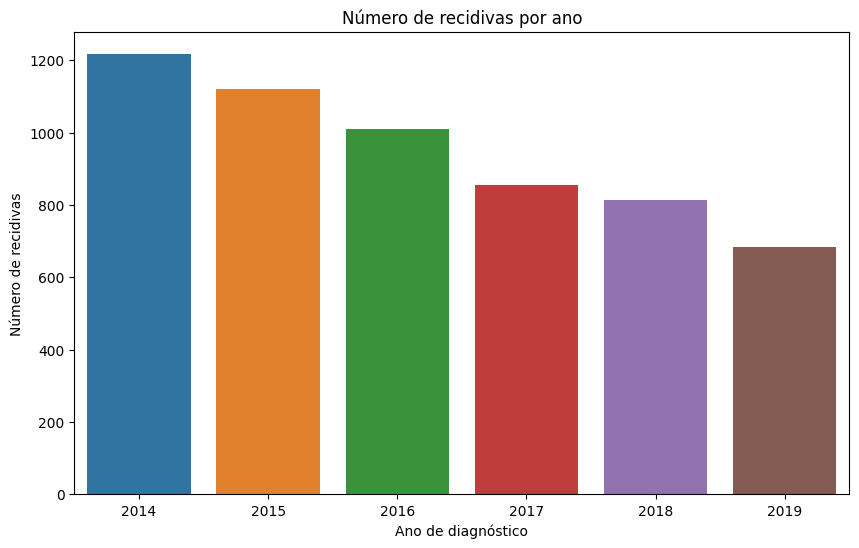

In [120]:
recurrence_counts = df.groupby('ANODIAG')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ANODIAG', y='REC', data=recurrence_counts)
plt.title('Número de recidivas por ano')
plt.xlabel('Ano de diagnóstico')
plt.ylabel('Número de recidivas')
plt.show()

<Figure size 1000x600 with 0 Axes>

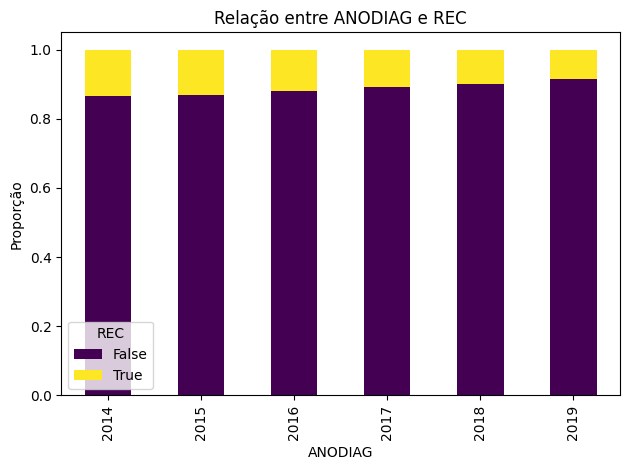

In [121]:
cross_tab = pd.crosstab(df['ANODIAG'], df['REC'], normalize='index')

plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('ANODIAG')
plt.ylabel('Proporção')
plt.title('Relação entre ANODIAG e REC')
plt.xticks(rotation=90)
plt.legend(title='REC', labels=['False', 'True'])
plt.tight_layout()
plt.show()

In [122]:
df.head()

,ESCOLARI,IDADE,CATEATEND,DIAGPREV,BASEDIAG,TOPO,MORFO,EC,PT,PN,...,IMUNOAPOS,OUTROAPOS,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,LATERALI,RRAS,HABILIT,REC
0,9,38,2,2,3,C509,80001,Y,,,...,0,0,14,***,***,2017,1,13,1,0
1,9,46,2,2,1,C509,80001,Y,,,...,0,0,22,972,994,2017,1,17,1,0
2,9,45,2,2,3,C502,80001,Y,Y,Y,...,0,0,***,13,***,2016,1,7,2,0
3,9,43,2,2,3,C500,80001,Y,,,...,0,0,28,9,37,2019,1,13,1,0
4,5,67,1,1,3,C501,80001,Y,Y,Y,...,0,0,0,42,42,2019,1,7,2,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50275 entries, 0 to 54216
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESCOLARI    50275 non-null  int64 
 1   IDADE       50275 non-null  int64 
 2   CATEATEND   50275 non-null  int64 
 3   DIAGPREV    50275 non-null  int64 
 4   BASEDIAG    50275 non-null  int64 
 5   TOPO        50275 non-null  object
 6   MORFO       50275 non-null  int64 
 7   EC          50275 non-null  object
 8   PT          50275 non-null  object
 9   PN          50275 non-null  object
 10  PM          50275 non-null  object
 11  NAOTRAT     50275 non-null  int64 
 12  NENHUM      50275 non-null  int64 
 13  CIRURGIA    50275 non-null  int64 
 14  RADIO       50275 non-null  int64 
 15  QUIMIO      50275 non-null  int64 
 16  HORMONIO    50275 non-null  int64 
 17  TMO         50275 non-null  int64 
 18  IMUNO       50275 non-null  int64 
 19  OUTROS      50275 non-null  int64 
 20  NENHUM

In [124]:
#As colunas CIDO e MORFO tem informações numéricas, mas na verdade representam dados categóricos. Vamos transformá-las no tipo object novamente
df['MORFO'] = df['MORFO'].astype('object')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50275 entries, 0 to 54216
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESCOLARI    50275 non-null  int64 
 1   IDADE       50275 non-null  int64 
 2   CATEATEND   50275 non-null  int64 
 3   DIAGPREV    50275 non-null  int64 
 4   BASEDIAG    50275 non-null  int64 
 5   TOPO        50275 non-null  object
 6   MORFO       50275 non-null  object
 7   EC          50275 non-null  object
 8   PT          50275 non-null  object
 9   PN          50275 non-null  object
 10  PM          50275 non-null  object
 11  NAOTRAT     50275 non-null  int64 
 12  NENHUM      50275 non-null  int64 
 13  CIRURGIA    50275 non-null  int64 
 14  RADIO       50275 non-null  int64 
 15  QUIMIO      50275 non-null  int64 
 16  HORMONIO    50275 non-null  int64 
 17  TMO         50275 non-null  int64 
 18  IMUNO       50275 non-null  int64 
 19  OUTROS      50275 non-null  int64 
 20  NENHUM

### Dividindo dataset em treino e teste

In [126]:
train = deepcopy(df.loc[df['ANODIAG']<2018])
test = deepcopy(df.loc[df['ANODIAG']>=2018])

In [127]:
X_train = deepcopy(train.loc[df['ANODIAG']<2018].drop('REC', axis=1))
X_test = deepcopy(test.loc[df['ANODIAG']>=2018].drop('REC', axis=1))

In [128]:
y_train = train.pop('REC')
y_test = test.pop('REC')

In [129]:
y_train.value_counts(normalize=True)

0    0.87648
1    0.12352
Name: REC, dtype: float64

In [130]:
y_test.value_counts(normalize=True)

0    0.907775
1    0.092225
Name: REC, dtype: float64

### Valores nulos e missings

In [131]:
#Verificando quais colunas do dataset possuem tipo object
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

In [132]:
object_cols

['TOPO', 'MORFO', 'EC', 'PT', 'PN', 'PM', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT']

As colunas 'CONSDIAG', 'TRATCONS', 'DIAGTAT', representam a quantidade em dias entre a consulta e  diagnóstico, entre o tratamento e a consulta e entre o diagnóstico e o tratamento. Portanto, essas são colunas que representam números inteiros e não devem ser consideradas do tipo 'object'. Para converte-las para o tipo correto, precisamos converter os nulos (representados nessas colunas como '***') em valores representados como null/NA.

In [133]:
qnt_dias_columns = ['CONSDIAG', 'TRATCONS', 'DIAGTRAT']

# Replace '***' with an empty string
X_train[qnt_dias_columns] = X_train[qnt_dias_columns].replace('***', '')

# Replace '***' with an empty string
X_test[qnt_dias_columns] = X_test[qnt_dias_columns].replace('***', '')

# Convert columns to numeric (int) type while handling empty strings
for col in qnt_dias_columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

In [134]:
#Verificando quais colunas do dataset possuem tipo object
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

In [135]:
object_cols

['TOPO', 'MORFO', 'EC', 'PT', 'PN', 'PM']

In [136]:
df.TOPO.value_counts()

C504    14302
C508    11392
C509    10614
C502     3641
C501     2909
C505     2680
C503     2222
C500     1991
C506      524
Name: TOPO, dtype: int64

In [137]:
df.TOPO.unique()

array(['C509', 'C502', 'C500', 'C501', 'C504', 'C508', 'C505', 'C503',
       'C506'], dtype=object)

In [138]:
df.MORFO.value_counts()

85003    34014
80103     2656
85203     2574
85002     2469
85233     1392
         ...  
80213        1
80143        1
91333        1
91823        1
88103        1
Name: MORFO, Length: 135, dtype: int64

In [139]:
df.MORFO.unique()

array([80001, 80003, 80011, 80102, 80103, 80123, 80143, 80203, 80213,
       80223, 80313, 80323, 80333, 80413, 80502, 80503, 80523, 80702,
       80703, 80713, 80763, 80833, 81302, 81303, 81402, 81403, 81903,
       82003, 82012, 82013, 82113, 82302, 82303, 82313, 82451, 82463,
       82553, 82603, 83103, 83133, 83143, 83153, 84013, 84073, 84083,
       84103, 84303, 84403, 84413, 84503, 84603, 84703, 84803, 84813,
       84903, 85002, 85003, 85012, 85013, 85023, 85032, 85033, 85042,
       85043, 85072, 85103, 85123, 85133, 85143, 85202, 85203, 85213,
       85222, 85223, 85233, 85243, 85303, 85403, 85413, 85423, 85433,
       85503, 85603, 85703, 85713, 85733, 85743, 85753, 87113, 87463,
       88003, 88013, 88023, 88043, 88053, 88103, 88211, 88251, 88323,
       88333, 88341, 88501, 88503, 88513, 88543, 88903, 88943, 89353,
       89803, 89823, 90201, 90203, 91203, 91333, 91823, 95903, 95913,
       95963, 96503, 96513, 96523, 96703, 96733, 96803, 96843, 96873,
       96903, 96913,

In [146]:
value_counts = df['MORFO'].value_counts()

# Filtrar valores que aparecem apenas uma vez
unique_values = value_counts[value_counts == 1].index.tolist()

print("Valores que aparecem apenas uma vez na coluna 'MORFO':", unique_values)

Valores que aparecem apenas uma vez na coluna 'MORFO': [84103, 96513, 96523, 83133, 96733, 80011, 84083, 96873, 88323, 82553, 96913, 96953, 84403, 97023, 84503, 97283, 96503, 81302, 88333, 87113, 88341, 88501, 88251, 88513, 88043, 80523, 80713, 80833, 89823, 85423, 80213, 80143, 91333, 91823, 88103]


In [149]:
len(unique_values)

35

In [140]:
df.EC.value_counts()

IA       10986
IIA       9990
IIB       6507
IIIA      5743
IV        4756
0         4516
IIIB      4339
IIIC      1387
IB         823
X          787
Y          441
Name: EC, dtype: int64

In [141]:
df.PT.value_counts()

         29122
2         6465
1C        4814
1B        1741
3         1432
IS        1178
0         1130
1A         841
1          838
CDIS       757
4B         564
X          513
4          341
1MIC       145
4D          96
CLIS        91
Y           90
4A          78
4C          23
PAGET       13
T1C          1
T2           1
T1B          1
Name: PT, dtype: int64

In [142]:
df.PN.value_counts()

         29401
0        12757
1         4710
2          904
2A         866
X          734
3A         437
3          309
Y           89
3C          27
2B          23
3B          15
N0           2
N1           1
Name: PN, dtype: int64

In [143]:
df.PM.value_counts()

       33461
0      15599
1        641
X        487
Y         84
M0         3
Name: PM, dtype: int64

### One-hot encoding

In [144]:
X_train.head()

,ESCOLARI,IDADE,CATEATEND,DIAGPREV,BASEDIAG,TOPO,MORFO,EC,PT,PN,...,TMOAPOS,IMUNOAPOS,OUTROAPOS,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,LATERALI,RRAS,HABILIT
0,9,38,2,2,3,C509,80001,Y,,,...,0,0,0,14.0,NaN,NaN,2017,1,13,1
1,9,46,2,2,1,C509,80001,Y,,,...,0,0,0,22.0,972.0,994.0,2017,1,17,1
2,9,45,2,2,3,C502,80001,Y,Y,Y,...,0,0,0,NaN,13.0,NaN,2016,1,7,2
6,9,75,2,2,3,C509,80001,Y,,,...,0,0,0,53.0,0.0,53.0,2017,2,13,1
7,4,27,2,2,3,C504,80003,Y,Y,Y,...,0,0,0,64.0,21.0,85.0,2016,1,7,2


In [145]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
